In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

## **Train dataset**

In [34]:
def target_func(x):
    # return torch.pow(2, x_train) * torch.sin(torch.pow(2, -x_train))
    return 2**x * torch.sin(2**-x)

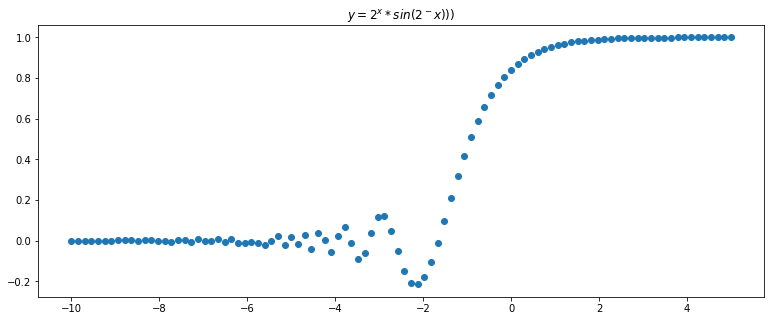

In [4]:
x_train = torch.linspace(-10, 5, 100)
y_train = target_func(x_train)
  
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = 2^x * sin(2^-x)))$');

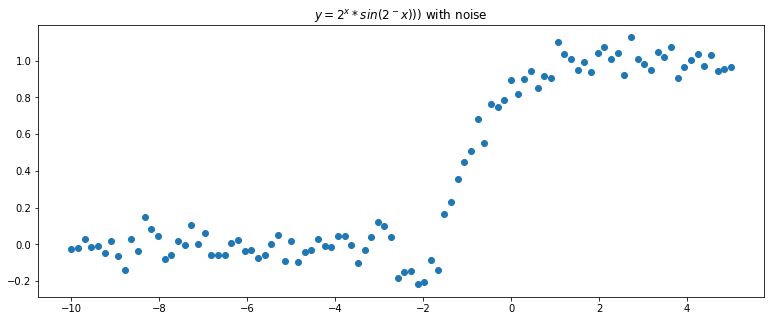

In [5]:
noise = torch.randn(y_train.shape) / 20.
y_train += noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = 2^x * sin(2^-x)))$ with noise');

In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

## **Validation dataset**

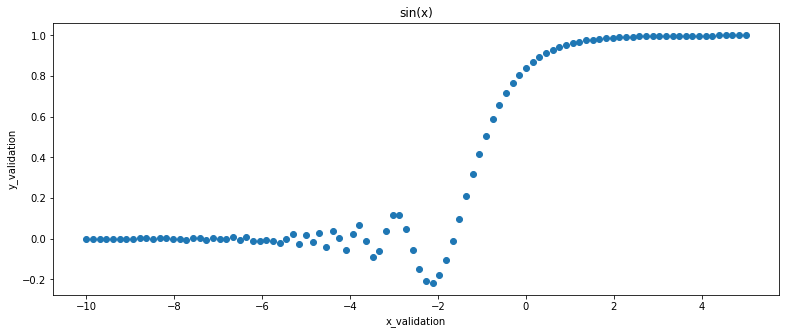

In [37]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_func(x_validation)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
y_validation.unsqueeze_(1)
x_validation.unsqueeze_(1)

## **Model construction**

In [129]:
class RegressionNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()
      self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
      self.act1 = torch.nn.Tanh()
      self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
      self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)
  
    def forward(self, x):
      x = self.fc1(x)
      x = self.act1(x)
      x = self.fc2(x)
      x = self.act1(x)
      x = self.fc3(x)
      return x

reg_net = RegressionNet(12)

## **Prediction**


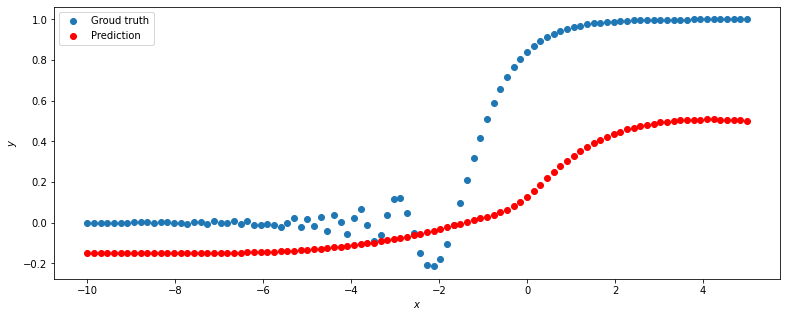

In [112]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(reg_net, x_validation, y_validation)

## **Optimizer**

In [131]:
optimizer = torch.optim.Adam(reg_net.parameters(), lr=0.01)

## **Loss function**

In [114]:
def loss(pred, target):
    # abs_values = torch.abs(pred - target)
    # return abs_values.mean()
    squares = (pred - target) ** 2
    return squares.mean()

## **Training procedure**

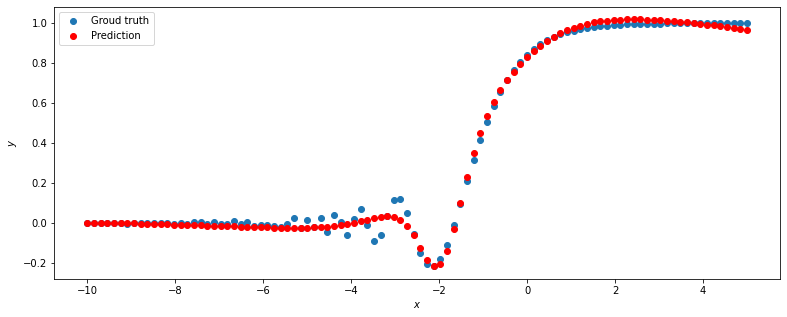

In [134]:
for epoch_index in range(500):
    optimizer.zero_grad()

    y_pred = reg_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()
    optimizer.step()

predict(reg_net, x_validation, y_validation)

## **Check MAE metric**

In [135]:
def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(reg_net.forward(x_validation), y_validation).item())

0.019662756472826004
